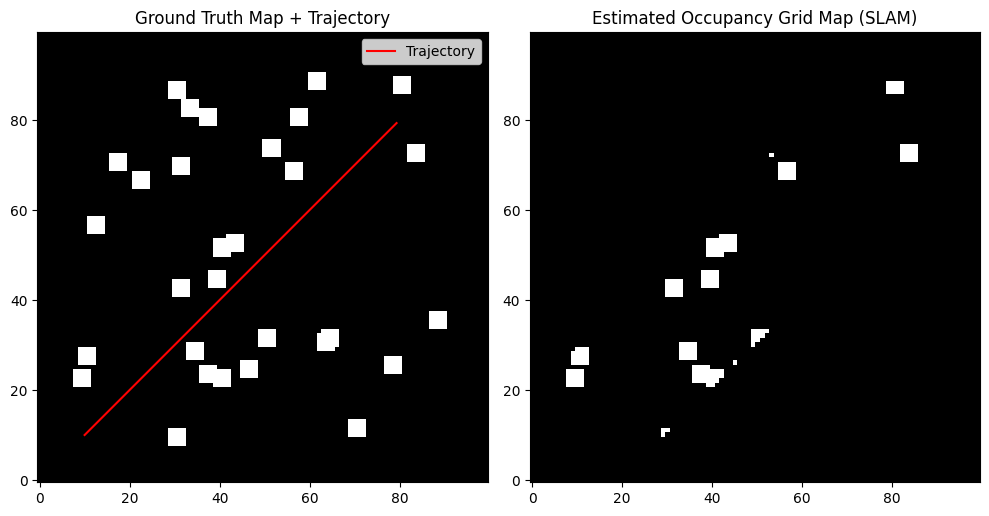

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def create_world(grid_size=100, num_obstacles=30):
    world = np.zeros((grid_size, grid_size))
    for _ in range(num_obstacles):
        x, y = np.random.randint(10, grid_size - 10, 2)
        world[x-2:x+2, y-2:y+2] = 1
    return world

def sense(world, robot_pos, sensor_range=10):
    x, y = robot_pos
    visible = []
    for dx in range(-sensor_range, sensor_range):
        for dy in range(-sensor_range, sensor_range):
            nx, ny = int(x + dx), int(y + dy)
            if 0 <= nx < world.shape[0] and 0 <= ny < world.shape[1]:
                if world[nx, ny] == 1:
                    visible.append((nx, ny))
    return visible

def slam(world, start, goal, steps=500, move_step=1):
    robot_pos = np.array(start, dtype=np.float32)
    trajectory = [robot_pos.copy()]
    estimated_map = np.zeros_like(world)

    for _ in range(steps):
        direction = goal - robot_pos
        direction /= np.linalg.norm(direction)
        new_pos = robot_pos + move_step * direction

        if not (0 <= new_pos[0] < world.shape[0] and 0 <= new_pos[1] < world.shape[1]):
            continue
        if world[int(new_pos[0]), int(new_pos[1])] == 1:
            continue

        robot_pos = new_pos
        trajectory.append(robot_pos.copy())

        visible = sense(world, robot_pos)
        for x, y in visible:
            estimated_map[int(x), int(y)] = 1

        if np.linalg.norm(robot_pos - goal) < 1.0:
            break

    return np.array(trajectory), estimated_map

world = create_world()
start = [10, 10]
goal = [80, 80]
trajectory, est_map = slam(world, start, goal)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(world.T, origin='lower', cmap='gray')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', label='Trajectory')
plt.title("Ground Truth Map + Trajectory")
plt.legend()

plt.subplot(1, 2, 2)
plt.imshow(est_map.T, origin='lower', cmap='gray')
plt.title("Estimated Occupancy Grid Map (SLAM)")
plt.tight_layout()
plt.show()